In [1]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import math
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
train_data_path = "data/train.jsonl"

In [6]:
# load data
df = pd.read_json(train_data_path, lines=True)




In [7]:
df.head()

,uuid,postId,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,targetMedia,targetUrl,provenance,spoiler,spoilerPositions,tags
0,0af11f6b-c889-4520-9372-66ba25cb7657,532quh,"[Wes Welker Wanted Dinner With Tom Brady, But ...",reddit,[It’ll be just like old times this weekend for...,"Wes Welker Wanted Dinner With Tom Brady, But P...",It'll be just like old times this weekend for ...,"new england patriots, ricky doyle, top stories,","[http://pixel.wp.com/b.gif?v=noscript, http://...",http://nesn.com/2016/09/wes-welker-wanted-dinn...,"{'source': 'anonymized', 'humanSpoiler': 'They...",[how about that morning we go throw?],"[[[3, 151], [3, 186]]]",[passage]
1,b1a1f63d-8853-4a11-89e8-6b2952a393ec,411701128456593408,[NASA sets date for full recovery of ozone hole],Twitter,[2070 is shaping up to be a great year for Mot...,Hole In Ozone Layer Expected To Make Full Reco...,2070 is shaping up to be a great year for Moth...,"ozone layer,ozone hole determined by weather,M...",[http://s.m.huffpost.com/assets/Logo_Huffingto...,http://huff.to/1cH672Z,"{'source': 'anonymized', 'humanSpoiler': '2070...",[2070],"[[[0, 0], [0, 4]]]",[phrase]
2,008b7b19-0445-4e16-8f9e-075b73f80ca4,380537005123190784,[This is what makes employees happy -- and it'...,Twitter,"[Despite common belief, money isn't the key to...",Intellectual Stimulation Trumps Money For Empl...,By: Chad Brooks \r\nPublished: 09/18/2013 06:4...,"employee happiness money,employee happiness in...",[http://i.huffpost.com/gen/1359674/images/o-HA...,http://huff.to/1epfeaw,"{'source': 'anonymized', 'humanSpoiler': 'Inte...",[intellectual stimulation],"[[[1, 186], [1, 210]]]",[phrase]
3,31ecf93c-3e21-4c80-949b-aa549a046b93,844567852531286016,[Passion is overrated — 7 work habits you need...,Twitter,"[It’s common wisdom. Near gospel really, and n...","‘Follow your passion’ is wrong, here are 7 hab...",There's a lot more to work that loving your job,"business, work-life, careers",None,None,"{'source': 'anonymized', 'humanSpoiler': None,...",[Purpose connects us to something bigger and i...,"[[[11, 25], [11, 101]], [[17, 56], [17, 85]], ...",[multi]
4,31b108a3-c828-421a-a4b9-cf651e9ac859,814186311573766144,[The perfect way to cook rice so that it's per...,Twitter,"[Boiling rice may seem simple, but there is a ...",Revealed: The perfect way to cook rice so that...,The question 'How does one cook rice properly?...,"Quora,users,share,perfect,way,cook,rice",None,None,"{'source': 'anonymized', 'humanSpoiler': None,...",[in a rice cooker],"[[[5, 60], [5, 76]]]",[phrase]


In [8]:
df['postText']


0       [Wes Welker Wanted Dinner With Tom Brady, But ...
1        [NASA sets date for full recovery of ozone hole]
2       [This is what makes employees happy -- and it'...
3       [Passion is overrated — 7 work habits you need...
4       [The perfect way to cook rice so that it's per...
                              ...                        
3195    [Has Facebook's video explosion completely sha...
3196    [Cop Is Eating At A Chili's When Teen Hands Hi...
3197    [5 popular myths about visible signs of aging ...
3198    [You need to see this Twitter account that pre...
3199         [GOP congressman comes out for gay marriage]
Name: postText, Length: 3200, dtype: object

In [19]:
df['targetTitle']

0       Wes Welker Wanted Dinner With Tom Brady, But P...
1       Hole In Ozone Layer Expected To Make Full Reco...
2       Intellectual Stimulation Trumps Money For Empl...
3       ‘Follow your passion’ is wrong, here are 7 hab...
4       Revealed: The perfect way to cook rice so that...
                              ...                        
3195    Facebook Video Surging, But YouTube Still Offe...
3196    Cop is eating at Chili's when teen hands him f...
3197    5 popular myths about visible signs of aging t...
3198    WTF, It Looks Like This Twitter Account "Predi...
3199    Pennsylvania GOP Rep. Charlie Dent Comes Out F...
Name: targetTitle, Length: 3200, dtype: object

In [20]:
df['targetParagraphs']

0       [It’ll be just like old times this weekend for...
1       [2070 is shaping up to be a great year for Mot...
2       [Despite common belief, money isn't the key to...
3       [It’s common wisdom. Near gospel really, and n...
4       [Boiling rice may seem simple, but there is a ...
                              ...                        
3195    [A long time ago in a galaxy far, far away...W...
3196    [The Kansas City, Kansas Police Department are...
3197    [Obama looks decades younger already, but what...
3198    [What the HELL?!, 1. Unless you’re somewhere w...
3199    [Rep. Charlie Dent (R-Pa.) came out in support...
Name: targetParagraphs, Length: 3200, dtype: object

In [9]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]




In [10]:

#df = df[['postText', 'targetParagraphs']]
df = df[['postText', 'targetTitle', 'targetParagraphs']]
df

,postText,targetTitle,targetParagraphs
0,"[Wes Welker Wanted Dinner With Tom Brady, But ...","Wes Welker Wanted Dinner With Tom Brady, But P...",[It’ll be just like old times this weekend for...
1,[NASA sets date for full recovery of ozone hole],Hole In Ozone Layer Expected To Make Full Reco...,[2070 is shaping up to be a great year for Mot...
2,[This is what makes employees happy -- and it'...,Intellectual Stimulation Trumps Money For Empl...,"[Despite common belief, money isn't the key to..."
3,[Passion is overrated — 7 work habits you need...,"‘Follow your passion’ is wrong, here are 7 hab...","[It’s common wisdom. Near gospel really, and n..."
4,[The perfect way to cook rice so that it's per...,Revealed: The perfect way to cook rice so that...,"[Boiling rice may seem simple, but there is a ..."
...,...,...,...
3195,[Has Facebook's video explosion completely sha...,"Facebook Video Surging, But YouTube Still Offe...","[A long time ago in a galaxy far, far away...W..."
3196,[Cop Is Eating At A Chili's When Teen Hands Hi...,Cop is eating at Chili's when teen hands him f...,"[The Kansas City, Kansas Police Department are..."
3197,[5 popular myths about visible signs of aging ...,5 popular myths about visible signs of aging t...,"[Obama looks decades younger already, but what..."
3198,[You need to see this Twitter account that pre...,"WTF, It Looks Like This Twitter Account ""Predi...","[What the HELL?!, 1. Unless you’re somewhere w..."


In [11]:
# Convert all columns into strings
# df.loc[:, ['postText', 'targetParagraphs']] = df.loc[:, ['postText', 'targetParagraphs']].astype(str)
df.loc[:, ['postText', 'targetTitle', 'targetParagraphs']] = df.loc[:, ['postText', 'targetTitle', 'targetParagraphs']].astype(str)
df

,postText,targetTitle,targetParagraphs
0,"['Wes Welker Wanted Dinner With Tom Brady, But...","Wes Welker Wanted Dinner With Tom Brady, But P...",['It’ll be just like old times this weekend fo...
1,['NASA sets date for full recovery of ozone ho...,Hole In Ozone Layer Expected To Make Full Reco...,['2070 is shaping up to be a great year for Mo...
2,"[""This is what makes employees happy -- and it...",Intellectual Stimulation Trumps Money For Empl...,"[""Despite common belief, money isn't the key t..."
3,['Passion is overrated —\xa07 work habits you ...,"‘Follow your passion’ is wrong, here are 7 hab...","['It’s common wisdom. Near gospel really, and ..."
4,"[""The perfect way to cook rice so that it's pe...",Revealed: The perfect way to cook rice so that...,"['Boiling rice may seem simple, but there is a..."
...,...,...,...
3195,"[""Has Facebook's video explosion completely sh...","Facebook Video Surging, But YouTube Still Offe...","['A long time ago in a galaxy far, far away......"
3196,"[""Cop Is Eating At A Chili's When Teen Hands H...",Cop is eating at Chili's when teen hands him f...,"['The Kansas City, Kansas Police Department ar..."
3197,['5 popular myths about visible signs of aging...,5 popular myths about visible signs of aging t...,"['Obama looks decades younger already, but wha..."
3198,['You need to see this Twitter account that pr...,"WTF, It Looks Like This Twitter Account ""Predi...","['What the HELL?!', '1. Unless you’re somewher..."


In [12]:
# Tokenize the relevant columns (not actually used for the Bag of Word approach)
tokenizer = RegexpTokenizer(r"\w+")
df["postText_tokens"] = df.apply(lambda row: tokenizer.tokenize(row["postText"]), axis=1)
df["paragraph_tokens"] = df.apply(lambda row: tokenizer.tokenize(row["targetParagraphs"]), axis=1)
df["targetTitle_tokens"] = df.apply(lambda row: tokenizer.tokenize(row["targetTitle"]), axis=1)

In [24]:
df

,postText,targetTitle,targetParagraphs,postText_tokens,paragraph_tokens,targetTitle_tokens,combined_texts
0,"['Wes Welker Wanted Dinner With Tom Brady, But...","Wes Welker Wanted Dinner With Tom Brady, But P...",['It’ll be just like old times this weekend fo...,"[wes, welker, wanted, dinner, with, tom, brady...","[it, ll, be, just, like, old, time, this, week...","[wes, welker, wanted, dinner, with, tom, brady...",spoiler: wes welker wanted dinner with tom bra...
1,['NASA sets date for full recovery of ozone ho...,Hole In Ozone Layer Expected To Make Full Reco...,['2070 is shaping up to be a great year for Mo...,"[nasa, set, date, for, full, recovery, of, ozo...","[2070, is, shaping, up, to, be, a, great, year...","[hole, in, ozone, layer, expected, to, make, f...",spoiler: nasa set date for full recovery of oz...
2,"[""This is what makes employees happy -- and it...",Intellectual Stimulation Trumps Money For Empl...,"[""Despite common belief, money isn't the key t...","[this, is, what, make, employee, happy, and, i...","[despite, common, belief, money, isn, t, the, ...","[intellectual, stimulation, trump, money, for,...",spoiler: this is what make employee happy and ...
3,['Passion is overrated —\xa07 work habits you ...,"‘Follow your passion’ is wrong, here are 7 hab...","['It’s common wisdom. Near gospel really, and ...","[passion, is, overrated, xa07, work, habit, yo...","[it, s, common, wisdom, near, gospel, really, ...","[follow, your, passion, is, wrong, here, are, ...",spoiler: passion is overrated xa07 work habit ...
4,"[""The perfect way to cook rice so that it's pe...",Revealed: The perfect way to cook rice so that...,"['Boiling rice may seem simple, but there is a...","[the, perfect, way, to, cook, rice, so, that, ...","[boiling, rice, may, seem, simple, but, there,...","[revealed, the, perfect, way, to, cook, rice, ...",spoiler: the perfect way to cook rice so that ...
...,...,...,...,...,...,...,...
3195,"[""Has Facebook's video explosion completely sh...","Facebook Video Surging, But YouTube Still Offe...","['A long time ago in a galaxy far, far away......","[ha, facebook, s, video, explosion, completely...","[a, long, time, ago, in, a, galaxy, far, far, ...","[facebook, video, surging, but, youtube, still...",spoiler: ha facebook s video explosion complet...
3196,"[""Cop Is Eating At A Chili's When Teen Hands H...",Cop is eating at Chili's when teen hands him f...,"['The Kansas City, Kansas Police Department ar...","[cop, is, eating, at, a, chili, s, when, teen,...","[the, kansa, city, kansa, police, department, ...","[cop, is, eating, at, chili, s, when, teen, ha...",spoiler: cop is eating at a chili s when teen ...
3197,['5 popular myths about visible signs of aging...,5 popular myths about visible signs of aging t...,"['Obama looks decades younger already, but wha...","[5, popular, myth, about, visible, sign, of, a...","[obama, look, decade, younger, already, but, w...","[5, popular, myth, about, visible, sign, of, a...",spoiler: 5 popular myth about visible sign of ...
3198,['You need to see this Twitter account that pr...,"WTF, It Looks Like This Twitter Account ""Predi...","['What the HELL?!', '1. Unless you’re somewher...","[you, need, to, see, this, twitter, account, t...","[what, the, hell, 1, unless, you, re, somewher...","[wtf, it, look, like, this, twitter, account, ...",spoiler: you need to see this twitter account ...


In [14]:
# Lowercasing
df['postText_tokens'] = df['postText_tokens'].map(lambda row: list(map(str.lower, row)))
df['paragraph_tokens'] = df['paragraph_tokens'].map(lambda row: list(map(str.lower, row)))
df['targetTitle_tokens'] = df['targetTitle_tokens'].map(lambda row: list(map(str.lower, row)))

In [15]:
df

,postText,targetTitle,targetParagraphs,postText_tokens,paragraph_tokens,targetTitle_tokens
0,"['Wes Welker Wanted Dinner With Tom Brady, But...","Wes Welker Wanted Dinner With Tom Brady, But P...",['It’ll be just like old times this weekend fo...,"[wes, welker, wanted, dinner, with, tom, brady...","[it, ll, be, just, like, old, times, this, wee...","[wes, welker, wanted, dinner, with, tom, brady..."
1,['NASA sets date for full recovery of ozone ho...,Hole In Ozone Layer Expected To Make Full Reco...,['2070 is shaping up to be a great year for Mo...,"[nasa, sets, date, for, full, recovery, of, oz...","[2070, is, shaping, up, to, be, a, great, year...","[hole, in, ozone, layer, expected, to, make, f..."
2,"[""This is what makes employees happy -- and it...",Intellectual Stimulation Trumps Money For Empl...,"[""Despite common belief, money isn't the key t...","[this, is, what, makes, employees, happy, and,...","[despite, common, belief, money, isn, t, the, ...","[intellectual, stimulation, trumps, money, for..."
3,['Passion is overrated —\xa07 work habits you ...,"‘Follow your passion’ is wrong, here are 7 hab...","['It’s common wisdom. Near gospel really, and ...","[passion, is, overrated, xa07, work, habits, y...","[it, s, common, wisdom, near, gospel, really, ...","[follow, your, passion, is, wrong, here, are, ..."
4,"[""The perfect way to cook rice so that it's pe...",Revealed: The perfect way to cook rice so that...,"['Boiling rice may seem simple, but there is a...","[the, perfect, way, to, cook, rice, so, that, ...","[boiling, rice, may, seem, simple, but, there,...","[revealed, the, perfect, way, to, cook, rice, ..."
...,...,...,...,...,...,...
3195,"[""Has Facebook's video explosion completely sh...","Facebook Video Surging, But YouTube Still Offe...","['A long time ago in a galaxy far, far away......","[has, facebook, s, video, explosion, completel...","[a, long, time, ago, in, a, galaxy, far, far, ...","[facebook, video, surging, but, youtube, still..."
3196,"[""Cop Is Eating At A Chili's When Teen Hands H...",Cop is eating at Chili's when teen hands him f...,"['The Kansas City, Kansas Police Department ar...","[cop, is, eating, at, a, chili, s, when, teen,...","[the, kansas, city, kansas, police, department...","[cop, is, eating, at, chili, s, when, teen, ha..."
3197,['5 popular myths about visible signs of aging...,5 popular myths about visible signs of aging t...,"['Obama looks decades younger already, but wha...","[5, popular, myths, about, visible, signs, of,...","[obama, looks, decades, younger, already, but,...","[5, popular, myths, about, visible, signs, of,..."
3198,['You need to see this Twitter account that pr...,"WTF, It Looks Like This Twitter Account ""Predi...","['What the HELL?!', '1. Unless you’re somewher...","[you, need, to, see, this, twitter, account, t...","[what, the, hell, 1, unless, you, re, somewher...","[wtf, it, looks, like, this, twitter, account,..."


In [16]:
# Multiple space to single space and remove special characters
df[['postText_tokens', 'paragraph_tokens', 'targetTitle_tokens']] = df[['postText_tokens', 'paragraph_tokens', 'targetTitle_tokens']].replace(r'\s+', ' ', regex=True).replace(r'\W', ' ', regex=True)
#df[['postText_tokens', 'paragraph_tokens']] = df[['postText_tokens', 'paragraph_tokens']].replace(r'\s+', ' ', regex=True).replace(r'\W', ' ', regex=True)

In [17]:
df

,postText,targetTitle,targetParagraphs,postText_tokens,paragraph_tokens,targetTitle_tokens
0,"['Wes Welker Wanted Dinner With Tom Brady, But...","Wes Welker Wanted Dinner With Tom Brady, But P...",['It’ll be just like old times this weekend fo...,"[wes, welker, wanted, dinner, with, tom, brady...","[it, ll, be, just, like, old, times, this, wee...","[wes, welker, wanted, dinner, with, tom, brady..."
1,['NASA sets date for full recovery of ozone ho...,Hole In Ozone Layer Expected To Make Full Reco...,['2070 is shaping up to be a great year for Mo...,"[nasa, sets, date, for, full, recovery, of, oz...","[2070, is, shaping, up, to, be, a, great, year...","[hole, in, ozone, layer, expected, to, make, f..."
2,"[""This is what makes employees happy -- and it...",Intellectual Stimulation Trumps Money For Empl...,"[""Despite common belief, money isn't the key t...","[this, is, what, makes, employees, happy, and,...","[despite, common, belief, money, isn, t, the, ...","[intellectual, stimulation, trumps, money, for..."
3,['Passion is overrated —\xa07 work habits you ...,"‘Follow your passion’ is wrong, here are 7 hab...","['It’s common wisdom. Near gospel really, and ...","[passion, is, overrated, xa07, work, habits, y...","[it, s, common, wisdom, near, gospel, really, ...","[follow, your, passion, is, wrong, here, are, ..."
4,"[""The perfect way to cook rice so that it's pe...",Revealed: The perfect way to cook rice so that...,"['Boiling rice may seem simple, but there is a...","[the, perfect, way, to, cook, rice, so, that, ...","[boiling, rice, may, seem, simple, but, there,...","[revealed, the, perfect, way, to, cook, rice, ..."
...,...,...,...,...,...,...
3195,"[""Has Facebook's video explosion completely sh...","Facebook Video Surging, But YouTube Still Offe...","['A long time ago in a galaxy far, far away......","[has, facebook, s, video, explosion, completel...","[a, long, time, ago, in, a, galaxy, far, far, ...","[facebook, video, surging, but, youtube, still..."
3196,"[""Cop Is Eating At A Chili's When Teen Hands H...",Cop is eating at Chili's when teen hands him f...,"['The Kansas City, Kansas Police Department ar...","[cop, is, eating, at, a, chili, s, when, teen,...","[the, kansas, city, kansas, police, department...","[cop, is, eating, at, chili, s, when, teen, ha..."
3197,['5 popular myths about visible signs of aging...,5 popular myths about visible signs of aging t...,"['Obama looks decades younger already, but wha...","[5, popular, myths, about, visible, signs, of,...","[obama, looks, decades, younger, already, but,...","[5, popular, myths, about, visible, signs, of,..."
3198,['You need to see this Twitter account that pr...,"WTF, It Looks Like This Twitter Account ""Predi...","['What the HELL?!', '1. Unless you’re somewher...","[you, need, to, see, this, twitter, account, t...","[what, the, hell, 1, unless, you, re, somewher...","[wtf, it, looks, like, this, twitter, account,..."


In [18]:
# Lemmatize tokens
df['postText_tokens'] = df['postText_tokens'].apply(lemmatize_text)
df['paragraph_tokens'] = df['paragraph_tokens'].apply(lemmatize_text)
df['targetTitle_tokens'] = df['targetTitle_tokens'].apply(lemmatize_text)
df

,postText,targetTitle,targetParagraphs,postText_tokens,paragraph_tokens,targetTitle_tokens
0,"['Wes Welker Wanted Dinner With Tom Brady, But...","Wes Welker Wanted Dinner With Tom Brady, But P...",['It’ll be just like old times this weekend fo...,"[wes, welker, wanted, dinner, with, tom, brady...","[it, ll, be, just, like, old, time, this, week...","[wes, welker, wanted, dinner, with, tom, brady..."
1,['NASA sets date for full recovery of ozone ho...,Hole In Ozone Layer Expected To Make Full Reco...,['2070 is shaping up to be a great year for Mo...,"[nasa, set, date, for, full, recovery, of, ozo...","[2070, is, shaping, up, to, be, a, great, year...","[hole, in, ozone, layer, expected, to, make, f..."
2,"[""This is what makes employees happy -- and it...",Intellectual Stimulation Trumps Money For Empl...,"[""Despite common belief, money isn't the key t...","[this, is, what, make, employee, happy, and, i...","[despite, common, belief, money, isn, t, the, ...","[intellectual, stimulation, trump, money, for,..."
3,['Passion is overrated —\xa07 work habits you ...,"‘Follow your passion’ is wrong, here are 7 hab...","['It’s common wisdom. Near gospel really, and ...","[passion, is, overrated, xa07, work, habit, yo...","[it, s, common, wisdom, near, gospel, really, ...","[follow, your, passion, is, wrong, here, are, ..."
4,"[""The perfect way to cook rice so that it's pe...",Revealed: The perfect way to cook rice so that...,"['Boiling rice may seem simple, but there is a...","[the, perfect, way, to, cook, rice, so, that, ...","[boiling, rice, may, seem, simple, but, there,...","[revealed, the, perfect, way, to, cook, rice, ..."
...,...,...,...,...,...,...
3195,"[""Has Facebook's video explosion completely sh...","Facebook Video Surging, But YouTube Still Offe...","['A long time ago in a galaxy far, far away......","[ha, facebook, s, video, explosion, completely...","[a, long, time, ago, in, a, galaxy, far, far, ...","[facebook, video, surging, but, youtube, still..."
3196,"[""Cop Is Eating At A Chili's When Teen Hands H...",Cop is eating at Chili's when teen hands him f...,"['The Kansas City, Kansas Police Department ar...","[cop, is, eating, at, a, chili, s, when, teen,...","[the, kansa, city, kansa, police, department, ...","[cop, is, eating, at, chili, s, when, teen, ha..."
3197,['5 popular myths about visible signs of aging...,5 popular myths about visible signs of aging t...,"['Obama looks decades younger already, but wha...","[5, popular, myth, about, visible, sign, of, a...","[obama, look, decade, younger, already, but, w...","[5, popular, myth, about, visible, sign, of, a..."
3198,['You need to see this Twitter account that pr...,"WTF, It Looks Like This Twitter Account ""Predi...","['What the HELL?!', '1. Unless you’re somewher...","[you, need, to, see, this, twitter, account, t...","[what, the, hell, 1, unless, you, re, somewher...","[wtf, it, look, like, this, twitter, account, ..."


In [19]:
df['combined_texts'] = f"spoiler: {df['postText_tokens']} </s> document: {df['paragraph_tokens']} </s> title: {df['targetTitle_tokens']} </s>"

In [20]:
df['combined_texts'] = "spoiler: " + df['postText_tokens'].apply(lambda tokens: ' '.join(tokens)) + "</s> document: " + df['paragraph_tokens'].apply(lambda tokens: ' '.join(tokens)) + "</s> title: " + df['targetTitle_tokens'].apply(lambda tokens: ' '.join(tokens)) + "</s>"

In [21]:
df['combined_texts']

0       spoiler: wes welker wanted dinner with tom bra...
1       spoiler: nasa set date for full recovery of oz...
2       spoiler: this is what make employee happy and ...
3       spoiler: passion is overrated xa07 work habit ...
4       spoiler: the perfect way to cook rice so that ...
                              ...                        
3195    spoiler: ha facebook s video explosion complet...
3196    spoiler: cop is eating at a chili s when teen ...
3197    spoiler: 5 popular myth about visible sign of ...
3198    spoiler: you need to see this twitter account ...
3199    spoiler: gop congressman come out for gay marr...
Name: combined_texts, Length: 3200, dtype: object

In [77]:
combined = df['postText_tokens'] + df['paragraph_tokens']
combined

0       [wes, welker, wanted, dinner, with, tom, brady...
1       [nasa, set, date, for, full, recovery, of, ozo...
2       [this, is, what, make, employee, happy, and, i...
3       [passion, is, overrated, xa07, work, habit, yo...
4       [the, perfect, way, to, cook, rice, so, that, ...
                              ...                        
3195    [ha, facebook, s, video, explosion, completely...
3196    [cop, is, eating, at, a, chili, s, when, teen,...
3197    [5, popular, myth, about, visible, sign, of, a...
3198    [you, need, to, see, this, twitter, account, t...
3199    [gop, congressman, come, out, for, gay, marria...
Length: 3200, dtype: object

In [71]:
combined.to_csv('testa.csv', index=False)

In [79]:
unique_tokens = []
for item in combined:
    elements = set(item)
    unique_tokens.append(elements)

In [75]:
flat_list = [item for sublist in combined for item in sublist]

# Create a set from the flattened list
unique_tokens = set(flat_list)

NameError: name 'item' is not defined

In [74]:
unique_tokens

{'porcine',
 'pickel',
 'isn',
 'simon',
 'bite',
 'mayor',
 'bucket',
 'elvis',
 'cheese',
 'romance',
 'pesticide',
 'exciting',
 'pokémons',
 'iq',
 'legislative',
 'h',
 'leaked',
 'simultaneously',
 'danny',
 'washingto',
 'pool',
 'breast',
 'consultant',
 'cruel',
 'contestant',
 'former',
 'provocation',
 'stable',
 'alternative',
 'plugged',
 'shifting',
 'searching',
 'fainted',
 'result',
 'done',
 'first',
 'wale',
 'mammoth',
 'hines',
 'gran',
 'n3',
 'warming',
 'clay',
 'com',
 'hoping',
 'whoa',
 'babe',
 'historical',
 'hunchback',
 'lupin',
 'snape',
 'nyt',
 'people',
 'naming',
 'mcmillan',
 'cabin',
 'alien',
 'weeps',
 'siriusxm',
 'employing',
 'selfie',
 'unequal',
 'serious',
 'qvit',
 'dmt',
 'organizing',
 'suggest',
 'horrifying',
 'courtney',
 'feeling',
 'risqué',
 'tour',
 'wouldn',
 'cured',
 'token',
 'population',
 'glass',
 'hop',
 'pyramid',
 'costume',
 'scalia',
 'statement',
 'iphones',
 'rowan',
 'offered',
 'vape',
 'rafael',
 'jonas',
 'red',


In [ ]:



#df['combined_texts'] = df['postText_tokens'].apply(lambda tokens: ' '.join(tokens)) + " " + df['paragraph_tokens'].apply(lambda tokens: ' '.join(tokens)) + " " + df['targetTitle_tokens'].apply(lambda tokens: ' '.join(tokens))
df['combined_texts'] = df['postText_tokens'].apply(lambda tokens: ' '.join(tokens)) + " " + df['paragraph_tokens'].apply(lambda tokens: ' '.join(tokens))
df['combined_texts'] = df['postText_tokens'].apply(lambda tokens: ' '.join(tokens))



In [ ]:
 #field1 = ["token1", "token2", "token3", "token4", "token5"]
    #field2 = ["token2", "token3", "token6", "token7"]
    # combined = field1 + field2
    unique_tokens = set(combined)

    #print(unique_tokens)


    return df

In [ ]:
combined = df['postText'] + df['targetTitle']
    unique_tokens = set(combined)

    #print(unique_tokens)

In [49]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]


def preprocess_data(df):
    #df = df[['postText', 'targetParagraphs']]
    df = df[['postText', 'targetTitle']]

    # Convert all columns into strings
   # df.loc[:, ['postText', 'targetParagraphs']] = df.loc[:, ['postText', 'targetParagraphs']].astype(str)
    df.loc[:, ['postText', 'targetTitle']] = df.loc[:, ['postText', 'targetTitle']].astype(str)

    # Tokenize the relevant columns (not actually used for the Bag of Word approach)
    tokenizer = RegexpTokenizer(r"\w+")
    df["postText_tokens"] = df.apply(lambda row: tokenizer.tokenize(row["postText"]), axis=1)
    df["paragraph_tokens"] = df.apply(lambda row: tokenizer.tokenize(row["targetTitle"]), axis=1)
    #df["targetTitle_tokens"] = df.apply(lambda row: tokenizer.tokenize(row["targetTitle"]), axis=1)

    # Removing stopwords
   # stopwords = nltk.corpus.stopwords.words("english")
    #df["postText_tokens"] = df.apply(lambda row: [element for element in row["postText_tokens"] if element not in stopwords], axis=1)
    #df["paragraph_tokens"] = df.apply(lambda row: [element for element in row["paragraph_tokens"] if element not in stopwords], axis=1)
    #df["targetTitle_tokens"] = df.apply(lambda row: [element for element in row["targetTitle_tokens"] if element not in stopwords], axis=1)

    # Lowercasing
    df['postText_tokens'] = df['postText_tokens'].map(lambda row: list(map(str.lower, row)))
    df['paragraph_tokens'] = df['paragraph_tokens'].map(lambda row: list(map(str.lower, row)))
    #df['targetTitle_tokens'] = df['targetTitle_tokens'].map(lambda row: list(map(str.lower, row)))

    # Multiple space to single space and remove special characters
    #df[['postText_tokens', 'paragraph_tokens', 'targetTitle_tokens']] = df[['postText_tokens', 'paragraph_tokens', 'targetTitle_tokens']].replace(r'\s+', ' ', regex=True).replace(r'\W', ' ', regex=True)
    df[['postText_tokens', 'paragraph_tokens']] = df[['postText_tokens', 'paragraph_tokens']].replace(r'\s+', ' ', regex=True).replace(r'\W', ' ', regex=True)

    # Lemmatize tokens
    df['postText_tokens'] = df['postText_tokens'].apply(lemmatize_text)
    df['paragraph_tokens'] = df['paragraph_tokens'].apply(lemmatize_text)
    #df['targetTitle_tokens'] = df['targetTitle_tokens'].apply(lemmatize_text)

    #df['combined_texts'] = df['postText_tokens'].apply(lambda tokens: ' '.join(tokens)) + " " + df['paragraph_tokens'].apply(lambda tokens: ' '.join(tokens)) + " " + df['targetTitle_tokens'].apply(lambda tokens: ' '.join(tokens))
    #df['combined_texts'] = df['postText_tokens'].apply(lambda tokens: ' '.join(tokens)) + " " + df['paragraph_tokens'].apply(lambda tokens: ' '.join(tokens))
    df['combined_texts'] = df['postText_tokens'].apply(lambda tokens: ' '.join(tokens))
    
   

    return df

In [50]:
train_selected = preprocess_data(df)
#val_selected = preprocess_data(df2)
#test_selected = preprocess_data(df3)

#concatenated_df = pd.concat([df, df2], ignore_index=True)

X_train = train_selected['combined_texts']
#X_val = val_selected['combined_texts']
#X_test = test_selected['combined_texts']

C:\Users\vince\AppData\Local\Temp\ipykernel_3036\3661462671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, ['postText', 'targetTitle']] = df.loc[:, ['postText', 'targetTitle']].astype(str)
C:\Users\vince\AppData\Local\Temp\ipykernel_3036\3661462671.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["postText_tokens"] = df.apply(lambda row: tokenizer.tokenize(row["postText"]), axis=1)
C:\Users\vince\AppData\Local\Temp\ipykernel_3036\3661462671.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [51]:
X_train.head()

0    wes welker wanted dinner with tom brady but pa...
1        nasa set date for full recovery of ozone hole
2    this is what make employee happy and it s not ...
3    passion is overrated xa07 work habit you need ...
4    the perfect way to cook rice so that it s perf...
Name: combined_texts, dtype: object

In [48]:
X_train.to_csv('train_data.csv', index=False)

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [52]:
token_counts = [len(tokenizer.encode(text, truncation=False)) for text in X_train]

print(f"Minimum number of tokens: {min(token_counts)}")
print(f"Maximum number of tokens: {max(token_counts)}")
print(f"Average number of tokens: {sum(token_counts) / len(token_counts)}")

Minimum number of tokens: 4
Maximum number of tokens: 37
Average number of tokens: 14.6615625


In [53]:
max_seq_length = 512
below_max_length = sum([count <= max_seq_length for count in token_counts])

print(f"Number of sequences below {max_seq_length}: {below_max_length}")
print(f"Percentage of sequences below {max_seq_length}: {below_max_length / len(token_counts) * 100}")

Number of sequences below 512: 3200
Percentage of sequences below 512: 100.0


In [47]:
max_seq_length = 512
above_max_length = sum([count >= max_seq_length for count in token_counts])

print(f"Number of sequences above {max_seq_length}: {above_max_length}")
print(f"Percentage of sequences above {max_seq_length}: {above_max_length / len(token_counts) * 100}")

Number of sequences above 512: 0
Percentage of sequences above 512: 0.0


In [25]:
analyze_df = df[["postText", "postPlatform", "targetParagraphs", "targetTitle", "targetDescription", "targetKeywords", "spoiler", "tags"]]

KeyError: "['postPlatform', 'targetDescription', 'targetKeywords', 'spoiler', 'tags'] not in index"

In [10]:

analyze_df.describe()

,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,spoiler,tags
count,3200,3200,3200,3200,2933,2116,3200,3200
unique,3186,3,3184,3168,2813,1795,3147,3
top,[10 things you need to know before the opening...,Twitter,[The best movie to watch with someone you’d li...,10 things you need to know before the opening ...,,,[California],[phrase]
freq,3,1530,2,3,65,230,6,1367


In [22]:
analyze_df.head()

NameError: name 'analyze_df' is not defined

In [14]:
# Combine Texts - will contain concatenated strings instead of lists of strings
for c in ["postText", "targetParagraphs", "tags", "spoiler"]:
   analyze_df[c] = analyze_df[c].apply(lambda l: " ".join(l))
    #analyze_df.loc[:, c] = analyze_df[c].apply(lambda l: " ".join(l))

C:\Users\vince\AppData\Local\Temp\ipykernel_11296\276277330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyze_df[c] = analyze_df[c].apply(lambda l: " ".join(l))


In [15]:
analyze_df.describe()

,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,spoiler,tags
count,3200,3200,3200,3200,2933,2116,3200,3200
unique,3186,3,3184,3168,2813,1795,3147,3
top,10 things you need to know before the opening ...,Twitter,The best movie to watch with someone you’d lik...,10 things you need to know before the opening ...,,,California,phrase
freq,3,1530,2,3,65,230,6,1367


In [16]:
analyze_df.head()

,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,spoiler,tags
0,"Wes Welker Wanted Dinner With Tom Brady, But P...",reddit,It’ll be just like old times this weekend for ...,"Wes Welker Wanted Dinner With Tom Brady, But P...",It'll be just like old times this weekend for ...,"new england patriots, ricky doyle, top stories,",how about that morning we go throw?,passage
1,NASA sets date for full recovery of ozone hole,Twitter,2070 is shaping up to be a great year for Moth...,Hole In Ozone Layer Expected To Make Full Reco...,2070 is shaping up to be a great year for Moth...,"ozone layer,ozone hole determined by weather,M...",2070,phrase
2,This is what makes employees happy -- and it's...,Twitter,"Despite common belief, money isn't the key to ...",Intellectual Stimulation Trumps Money For Empl...,By: Chad Brooks \r\nPublished: 09/18/2013 06:4...,"employee happiness money,employee happiness in...",intellectual stimulation,phrase
3,Passion is overrated — 7 work habits you need ...,Twitter,"It’s common wisdom. Near gospel really, and no...","‘Follow your passion’ is wrong, here are 7 hab...",There's a lot more to work that loving your job,"business, work-life, careers",Purpose connects us to something bigger and in...,multi
4,The perfect way to cook rice so that it's perf...,Twitter,"Boiling rice may seem simple, but there is a v...",Revealed: The perfect way to cook rice so that...,The question 'How does one cook rice properly?...,"Quora,users,share,perfect,way,cook,rice",in a rice cooker,phrase


<Axes: xlabel='tags'>

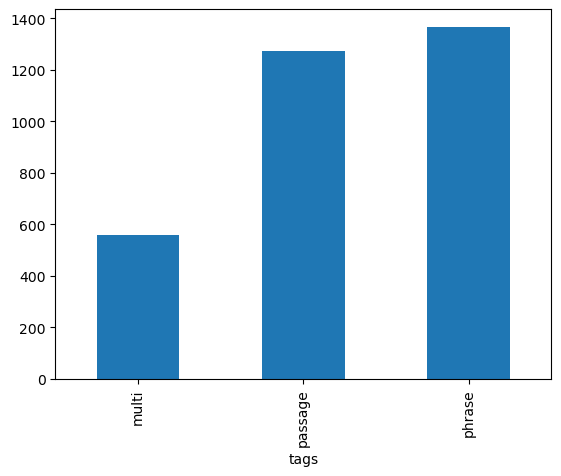

In [17]:
#spoiler per type
analyze_df.groupby("tags")["spoiler"].count().plot(kind="bar")

<Axes: xlabel='postPlatform'>

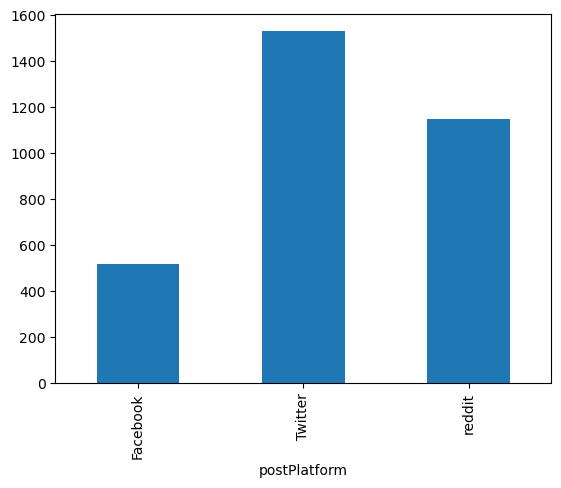

In [18]:
#spoiler per type
analyze_df.groupby("postPlatform")["spoiler"].count().plot(kind="bar")

In [19]:
# count spoiler per type
analyze_df.groupby("tags")["spoiler"].count()

tags
multi       559
passage    1274
phrase     1367
Name: spoiler, dtype: int64

In [60]:
def plot_col_per_tag(title: str, df: pd.DataFrame, show_mean: bool = True):
    # num_per_ax = math.ceil(math.sqrt(len(char_lenghths.columns)-1))
    fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
    fig.tight_layout(pad=6.0)
    fig.suptitle(title, fontsize=16)

    axs = axs.flat
    for column, ax in zip(df.columns, axs):
        if column != "tags":
            for tag in df.tags.unique():
                x = sorted(df[df["tags"]==tag][column].values)
                y = np.arange(len(x))
                ax.plot(x,y, label=tag)
                #ax.bar(x,y, label=tag)
                if show_mean:
                    ax.axvline(x=np.nanmean(x), color="black", linestyle=":")
            ax.legend()
            ax.set_title(column)
            ax.set_xlabel("Length")
            ax.set_ylabel("Spoiler")
    plt.show()
     

In [52]:
from collections import Counter

def plot_col_per_tag1(title: str, df: pd.DataFrame, show_mean: bool = True):
    fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
    fig.tight_layout(pad=6.0)
    fig.suptitle(title, fontsize=16)

    axs = axs.flat
    for column, ax in zip(df.columns, axs):
        if column != "tags":
            for tag in df.tags.unique():
                x = sorted(df[df["tags"]==tag][column].values)
                counter = Counter(x)
                y = range(len(counter))
                #ax.plot(x,y, label=tag)
                ax.plot(counter.keys(), counter.values(), label=tag)
                if show_mean:
                    ax.axhline(y=np.nanmean(list(counter.values())), color="black", linestyle=":")
            ax.legend()
            ax.set_title(column)
            ax.set_xlabel("Length")
            ax.set_ylabel("Count")
    plt.show()


In [53]:
def plot_col_per_tag2(title: str, df: pd.DataFrame):
    fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
    fig.tight_layout(pad=6.0)
    fig.suptitle(title, fontsize=16)

    axs = axs.flat
    for column, ax in zip(df.columns, axs):
        if column != "tags":
            for tag in df.tags.unique():
                x = df[df["tags"] == tag][column].values
                ax.hist(x, bins=20, alpha=0.7, label=tag)
            ax.legend()
            ax.set_title(column)
            ax.set_xlabel("Value")
            ax.set_ylabel("Frequency")
    plt.show()

# Type distribution

# Char Length

In [54]:
exclude_columns = ['tags', 'postPlatform']
#analyze_df.loc[:, ~analyze_df.columns.isin(exclude_columns)]
char_lengths = analyze_df.loc[:, ~analyze_df.columns.isin(exclude_columns)].applymap(lambda text: len(text) if text else 0)  # chars of strings
char_lengths["tags"] = analyze_df["tags"]

In [55]:
char_lengths.head()

,postText,targetParagraphs,targetTitle,targetDescription,targetKeywords,spoiler,tags
0,72,1669,74,267,47,35,passage
1,46,2105,64,105,133,4,phrase
2,65,1775,74,153,100,24,phrase
3,53,11147,66,47,28,287,multi
4,86,2523,111,180,39,16,phrase


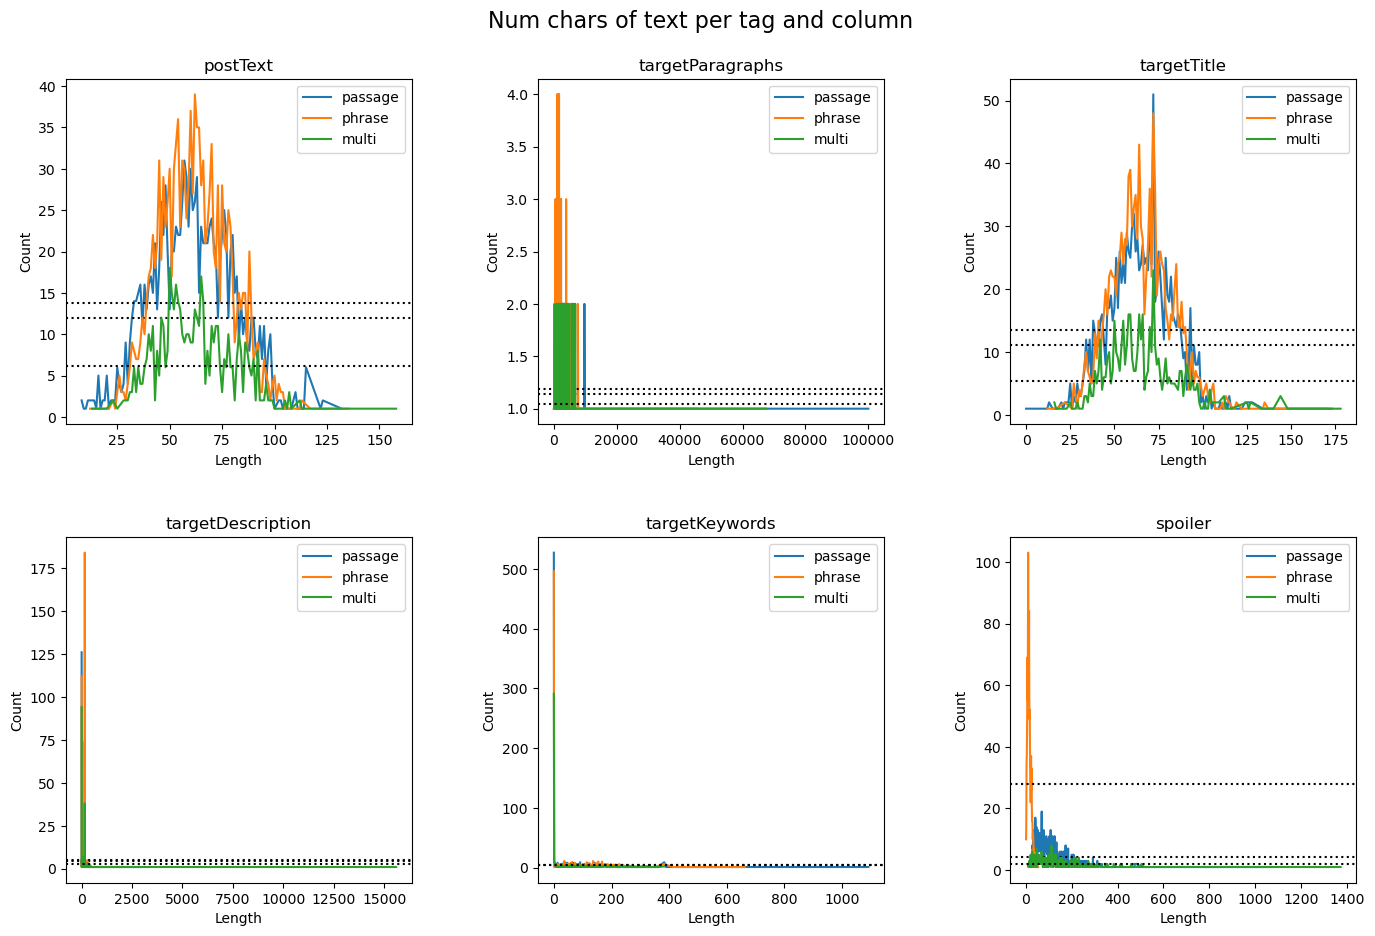

In [56]:
plot_col_per_tag1(title="Num chars of text per tag and column", df=char_lengths, show_mean=True)

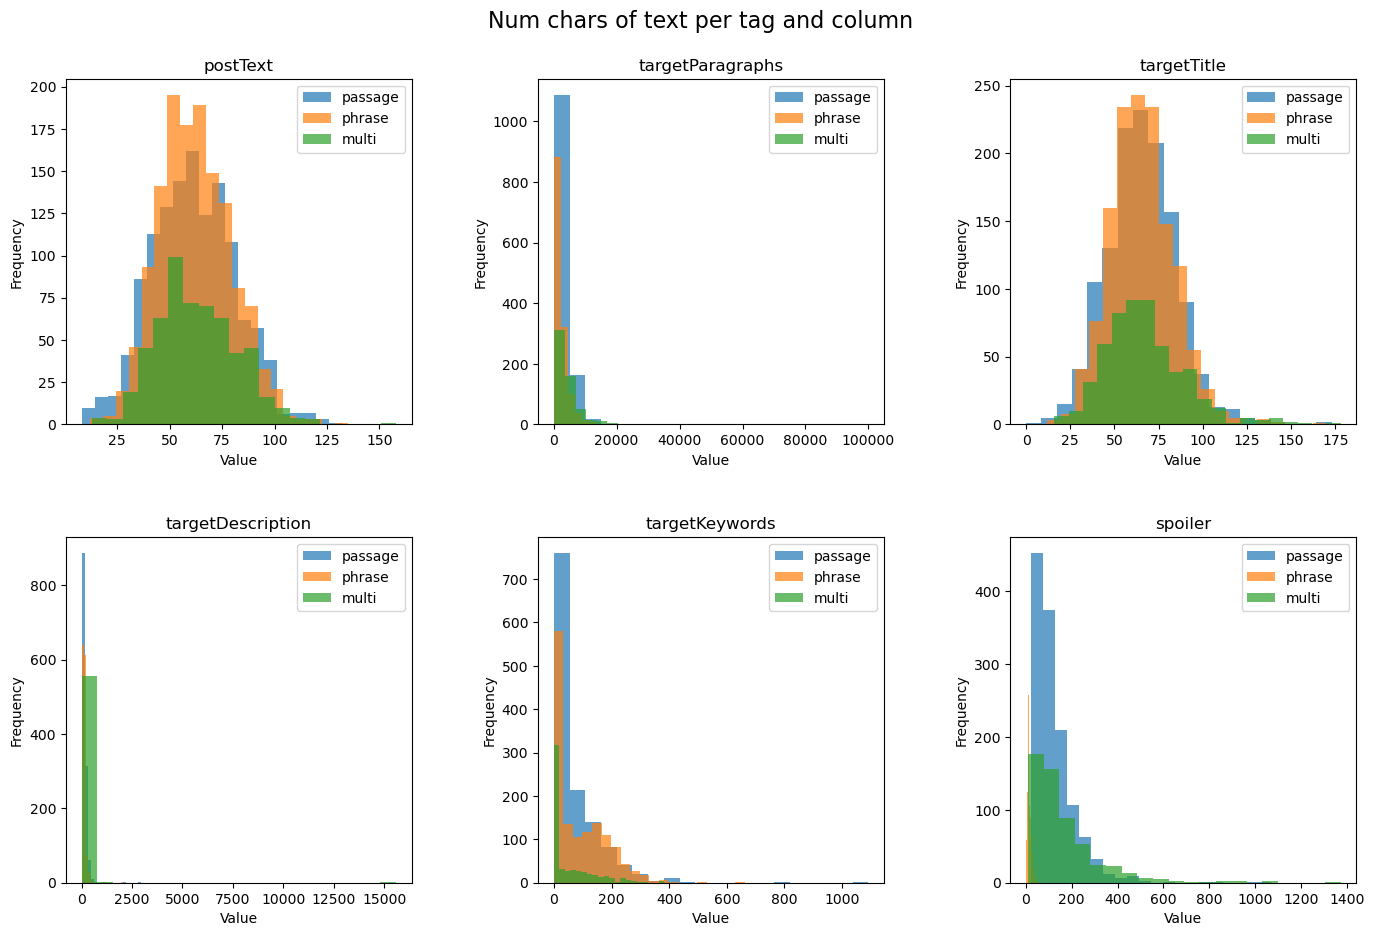

In [58]:
plot_col_per_tag2(title="Num chars of text per tag and column", df=char_lengths)

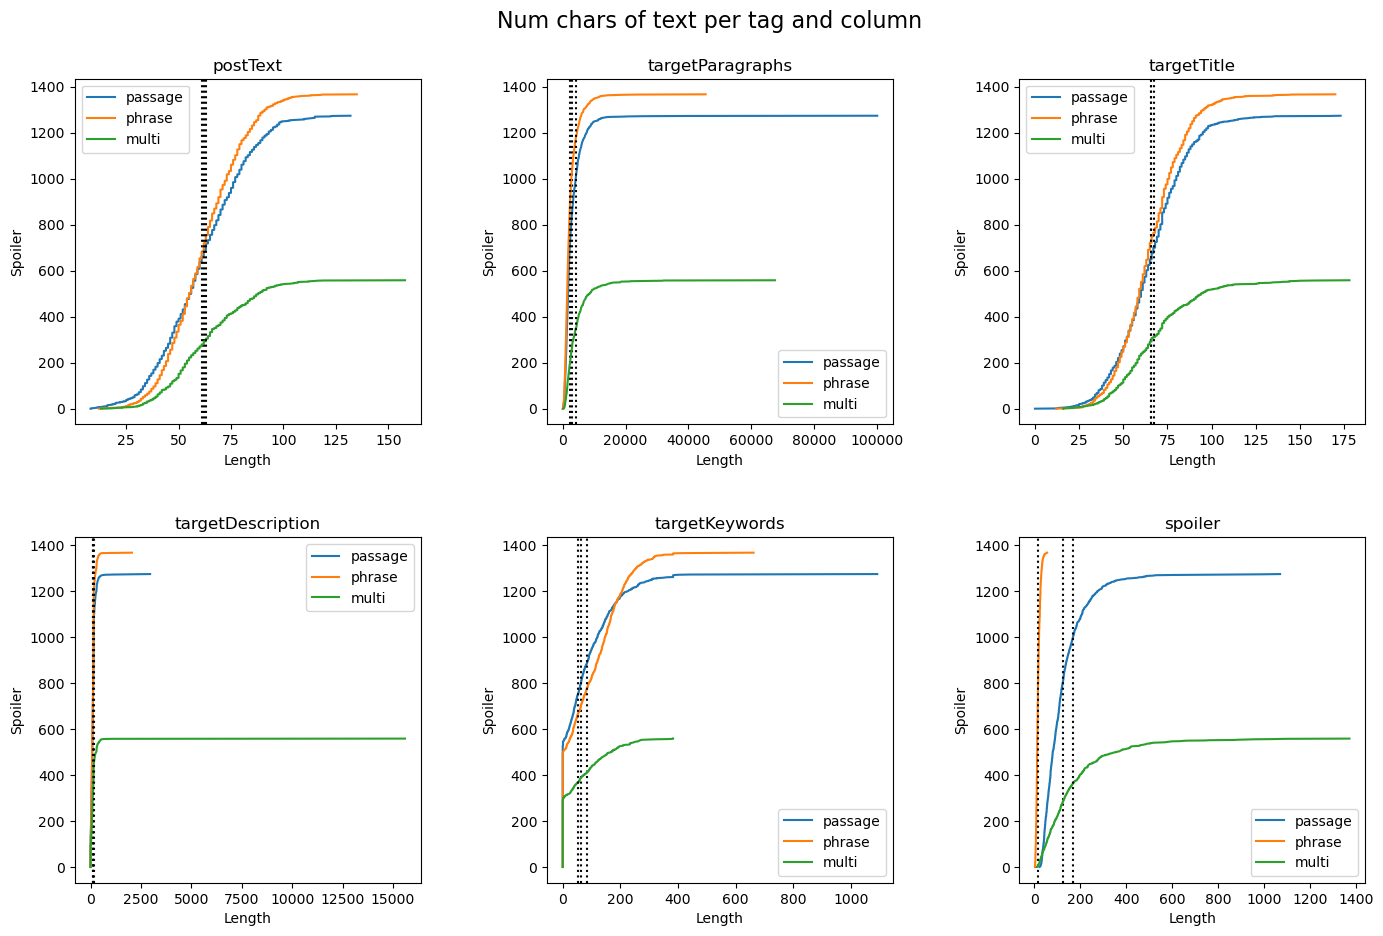

In [61]:
plot_col_per_tag(title="Num chars of text per tag and column", df=char_lengths, show_mean=True)

# Token Lenghth

In [27]:
token_lengths = analyze_df.loc[:, analyze_df.columns != 'tags'].applymap(lambda text: len(text.split(" ")) if text else 0)  # chars of strings
token_lengths["tags"] = analyze_df["tags"]

In [28]:
token_lengths.head()

,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,spoiler,tags
0,13,1,294,14,46,7,7,passage
1,9,1,349,12,18,14,1,phrase
2,12,1,276,9,22,8,2,phrase
3,9,1,1903,12,10,3,50,multi
4,17,1,478,21,31,1,4,phrase


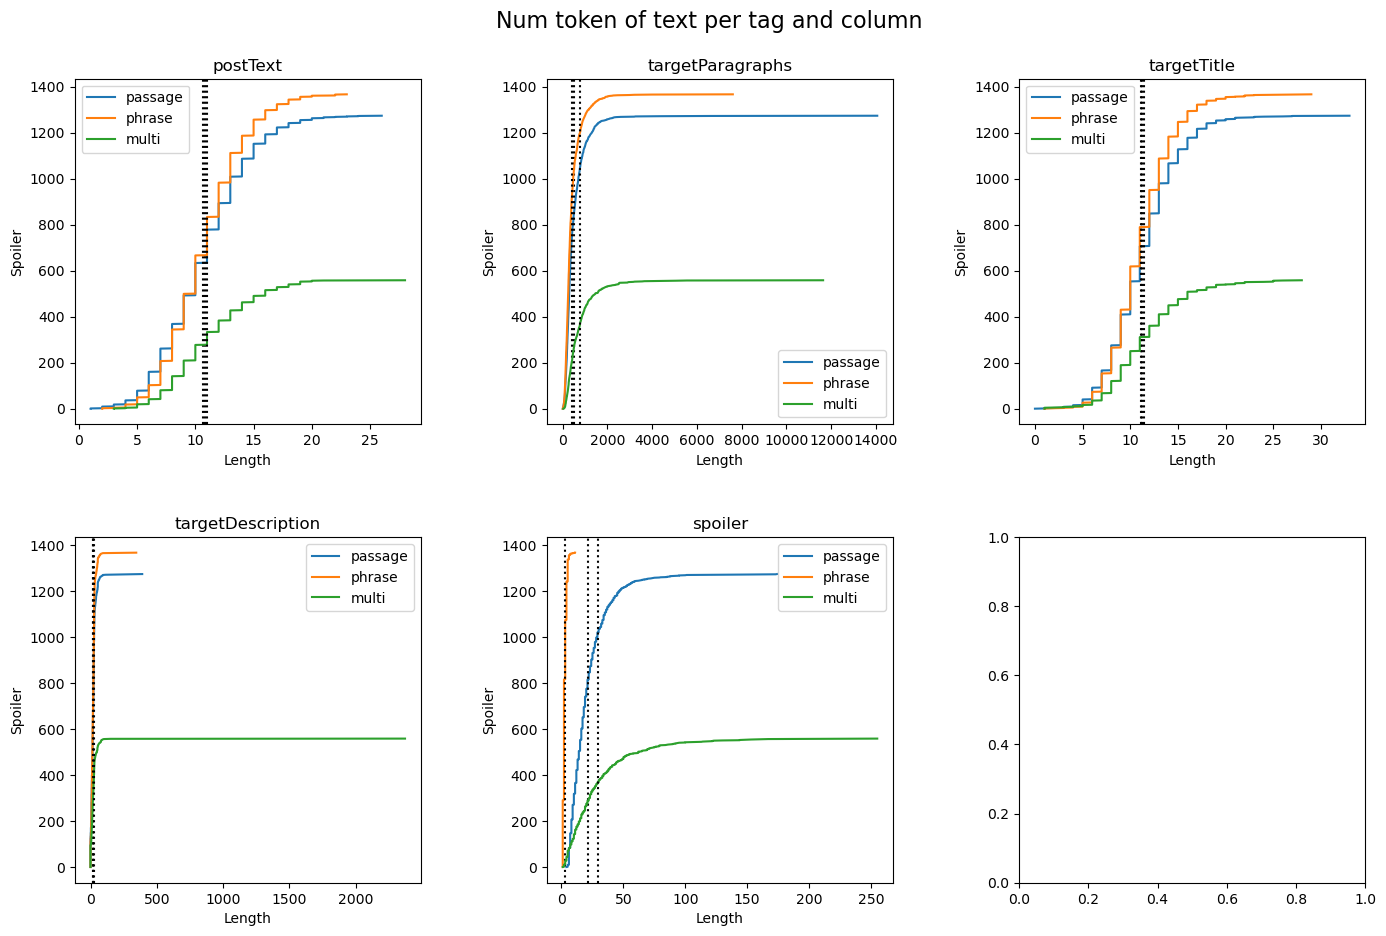

In [12]:
plot_col_per_tag(title="Num token of text per tag and column", df=token_lengths, show_mean=True)

# Number od numbers in general

In [13]:
numb_lengths = analyze_df.loc[:, analyze_df.columns != 'tags'].applymap(lambda text: len(re.findall(r"\d+", str(text))) if text else 0)  # chars of strings
numb_lengths["tags"] = analyze_df["tags"]

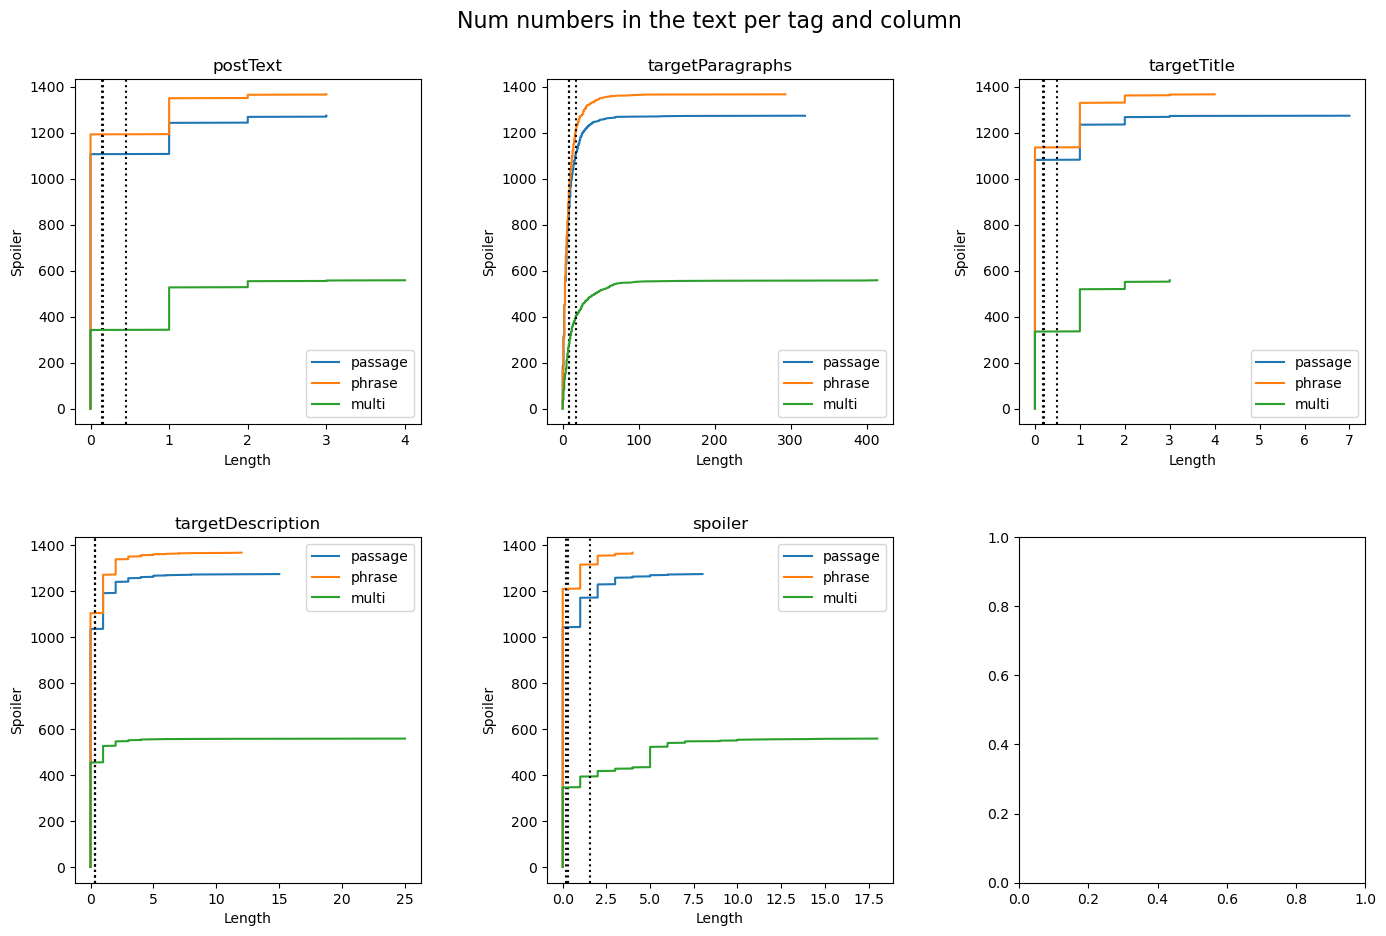

In [14]:
plot_col_per_tag(title="Num numbers in the text per tag and column", df=numb_lengths, show_mean=True)

# Number of enumeration numbers (single numbers)

In [15]:
enumeration_df = analyze_df.loc[:, analyze_df.columns != 'tags'].applymap(lambda text: len(re.findall(r"([^\d]|^)\d[^\d]", str(text))) if text else 0)  # chars of strings
enumeration_df["tags"] = analyze_df["tags"]

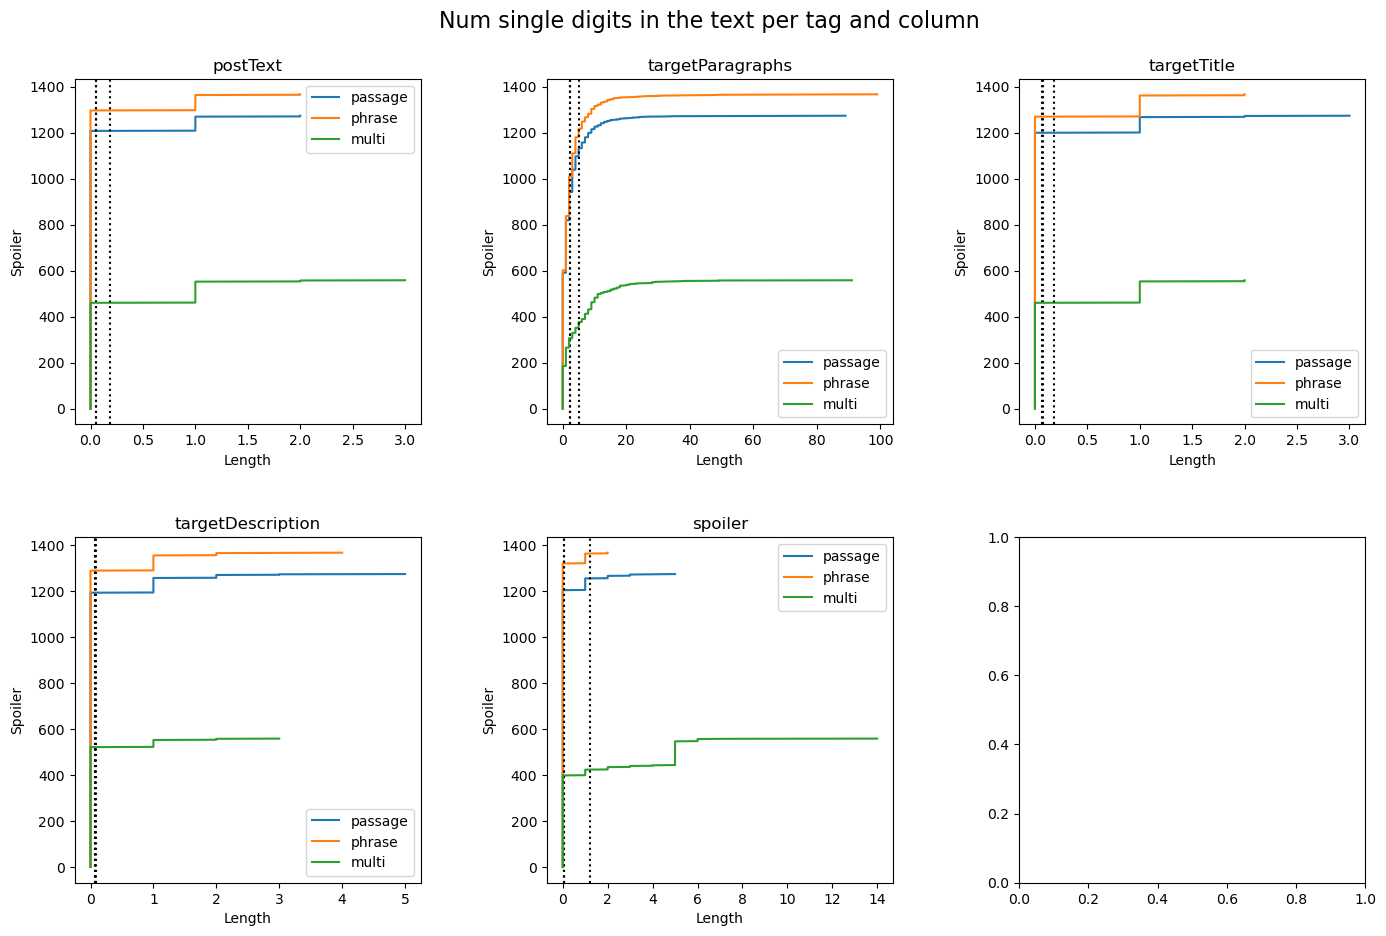

In [16]:
plot_col_per_tag(title="Num single digits in the text per tag and column", df=enumeration_df, show_mean=True)

# Table for reading


In [17]:
short = analyze_df[["postText", "spoiler", "tags"]]
short

,postText,spoiler,tags
0,"Wes Welker Wanted Dinner With Tom Brady, But P...",how about that morning we go throw?,passage
1,NASA sets date for full recovery of ozone hole,2070,phrase
2,This is what makes employees happy -- and it's...,intellectual stimulation,phrase
3,Passion is overrated — 7 work habits you need ...,Purpose connects us to something bigger and in...,multi
4,The perfect way to cook rice so that it's perf...,in a rice cooker,phrase
...,...,...,...
3195,Has Facebook's video explosion completely shak...,it hasn’t necessarily taken the wind out of Yo...,passage
3196,Cop Is Eating At A Chili's When Teen Hands Him...,"It read, ""Thanks for keeping us safe.""",passage
3197,5 popular myths about visible signs of aging t...,1. Anti-wrinkle creams will erase the fine lin...,multi
3198,You need to see this Twitter account that pred...,@beyoncefan666,phrase


# URLs and sources

In [18]:
source = df[["targetUrl", "tags"]]

In [19]:
def match(url):
    if url:
        url = re.findall(r"(?<=://)(.*?)(?=/)", url)[0] if re.findall(r"(?<=://)(.*?)(?=/)", url) else ""
        if url.startswith("www."):
            url = url[4:]
        return url

<Axes: >

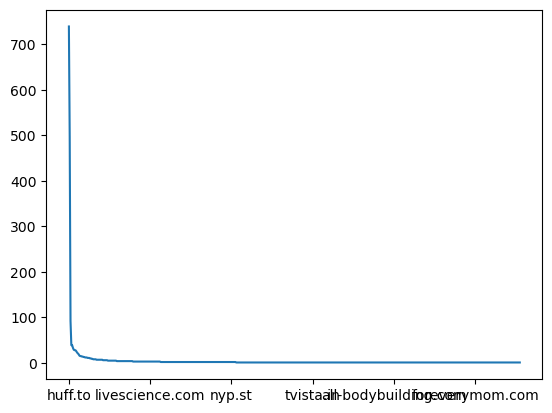

In [20]:
# Distribution of domainnames in the targetUrl
source["targetUrl"].apply(match).value_counts().plot()

In [21]:
# Unique domains
unique_sites = source["targetUrl"].apply(match).unique()
len(unique_sites)

557

In [22]:
source["domain"] = source["targetUrl"].apply(match)

C:\Users\vince\AppData\Local\Temp\ipykernel_31604\3509893551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source["domain"] = source["targetUrl"].apply(match)


<Axes: xlabel='domain'>

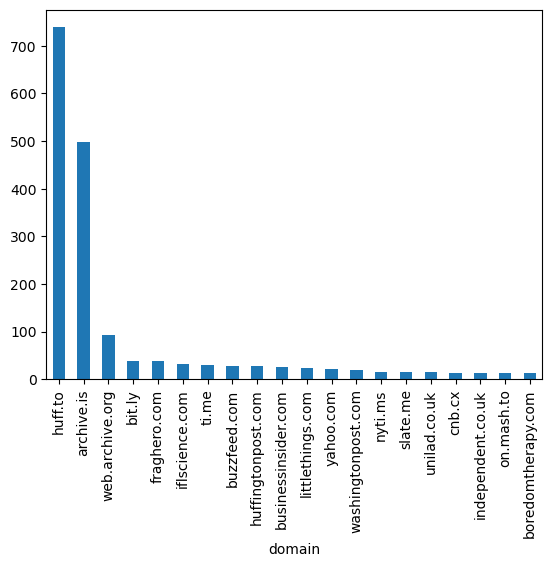

In [23]:
# Most articles come from huff.to followed by archive.is which is an archiving service.
# This could be further resolved.
source.groupby("domain")["tags"].count().sort_values(ascending=False).head(20).plot(kind="bar")

# Passage

In [24]:
analyze_df["tags_clean"]=analyze_df["tags"].explode()

C:\Users\vince\AppData\Local\Temp\ipykernel_31604\2474312436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyze_df["tags_clean"]=analyze_df["tags"].explode()


In [25]:
passage = analyze_df[analyze_df["tags_clean"]=="passage"][["targetParagraphs", "spoiler"]].explode("targetParagraphs").explode("spoiler")

In [26]:
passage[passage["targetParagraphs"]==passage["spoiler"]]

,targetParagraphs,spoiler
2191,Protests took place around the world to mark I...,Protests took place around the world to mark I...
2333,"Coworkers helped Chris Veseth, who was born wi...","Coworkers helped Chris Veseth, who was born wi..."
2376,Once you realize that the legs aren't shiny & ...,Once you realize that the legs aren't shiny & ...


In [27]:
analyze_df
analyze_df["tags_clean"].groupby(analyze_df["tags_clean"]).count()

tags_clean
multi       559
passage    1274
phrase     1367
Name: tags_clean, dtype: int64

In [28]:
passage.to_csv("Data/passage.csv")

In [29]:
passage

,targetParagraphs,spoiler
0,It’ll be just like old times this weekend for ...,how about that morning we go throw?
5,One of the biggest surprise announcements at A...,"Apple says that if AirPods are lost or stolen,..."
6,June 14th 2016 3.3K Shares They may look like ...,"""The more good games I had in them, the more I..."
7,"""It was cold and very foggy, the temperature w...",rainbow colours in the sky and a halo spanning...
8,5/5 say yes. Cheers to your health! All five o...,Red wine is clearly the drink of choice if you...
...,...,...
3189,What women want in a man has been revealed by ...,almost every other part of a man is considered...
3193,"If you're a vegetarian, we have some good news...",may cut your risk for colorectal cancer -- the...
3194,If You See A Purple Butterfly Sticker At The H...,one of her unborn twins had a condition called...
3195,"A long time ago in a galaxy far, far away...Wa...",it hasn’t necessarily taken the wind out of Yo...
